##**[UFO](https://en.wikipedia.org/wiki/Unidentified_flying_object/)-Sightings Exploratory data analysis(EDA)**

**Objective:-** An unidentified flying object ([UFO](https://en.wikipedia.org/wiki/Unidentified_flying_object)), or unidentified anomalous phenomenon (UAP),[a] is any perceived airborne, submerged or transmedium phenomenon that cannot be immediately identified or explained.[2] Upon investigation, most [UFOs](https://en.wikipedia.org/wiki/Unidentified_flying_object) are identified as known objects or atmospheric phenomena, while a small number remain unexplained.during the overall analysis our purpose to find out some key points:-

 * country-wise UFO sightings
 * city-wise UFO sightings
 * trend of ufo sightings incidents over the years etc.

In [ ]:
!pip install opendatasets

In [ ]:
!pip install us

**Import necessary libraries**

In [ ]:
# @title
import pandas as pd
import plotly.express as px
import opendatasets as od
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import plotly.graph_objects as go
import us



**Download dataset**

In [ ]:
UFO_dataset = od.download_kaggle_dataset("https://www.kaggle.com/datasets/mysarahmadbhat/ufo-sightings",data_dir="/content/ufo/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akashmishraaa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/ufo-sightings


100%|██████████| 4.88M/4.88M [00:00<00:00, 51.8MB/s]

**load dataset**

In [ ]:
UFO_dataset = pd.read_csv("/content/ufo/ufo-sightings/ufo_sightings_scrubbed.csv")

<ipython-input-5-a1ba531ce8af>:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  UFO_dataset = pd.read_csv("/content/ufo/ufo-sightings/ufo_sightings_scrubbed.csv")


In [ ]:
# @title
#  show top 5 rows
UFO_dataset.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [ ]:
# @title
# columns in the dataset
print("All columns:-")
UFO_dataset.columns

All columns:-


Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'duration (minutes)', 'year', 'month', 'hour',
       'date_difference(in days)', 'time_of_day'],
      dtype='object')

In [ ]:
# @title
# data types of each column
print("data types of each column:-")
UFO_dataset.dtypes

data types of each column


,0
datetime,datetime64[ns]
city,object
state,object
country,object
shape,object
duration (seconds),object
duration (hours/min),object
comments,object
date posted,datetime64[ns]
latitude,object


In [ ]:
# @title
new = UFO_dataset.dropna(how="any")
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  object 
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  object 
 10  longitude             66516 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


###**Data preprocessing**

In [ ]:
# @title
# drop duplicates

UFO_dataset = UFO_dataset.drop_duplicates()

In [ ]:
# @title
# check for nan values
print("nan count in column:- ")
UFO_dataset.isna().sum()

nan count in column:- 


,0
datetime,0
city,0
state,0
country,0
shape,0
duration (seconds),0
duration (hours/min),0
comments,0
date posted,0
latitude,0


***Convert  durations (seconds) column to  durations (minutes)***

In [ ]:
# @title
import re

def clean_text(text):

  # Remove everything except alphanumeric characters and spaces
  clean_text = re.sub(r'[^A-Za-z0-9\s]', '', text)

  # convert seconds to minutes and return

  return float(clean_text)/60



UFO_dataset["duration (minutes)"] = UFO_dataset['duration (seconds)'].astype("str").map(clean_text)

######***Nan values Imputation***

In [ ]:
# @title
# function to replace nan values from a column

def fill_na(column):


# try except block for KeyError handling
  try:

   # nan values values count & get total nan values
    nan_count = column.isna().value_counts()[True]

    # replace column Nan value if it's content <=20% from the total values in column
    if(((nan_count/len(column))*100)<=20):

# if dtype object replace with Mode
            if(str(column.dtype)=="object"):

                      column = column.fillna(column.mode()[0])

                      return column
            else:

                  # or replace with mean

                  column  =    column.fillna(column.mean())

                  return column

 # return column with no Nan values found
  except KeyError:

           return column




# apply the fill_na function
UFO_dataset[UFO_dataset.columns] = UFO_dataset.apply(fill_na)

In [ ]:
# count nan values from each column
UFO_dataset.isna().sum()

,0
datetime,0
city,0
state,0
country,0
shape,0
duration (seconds),0
duration (hours/min),0
comments,0
date posted,0
latitude,0


In [ ]:
# @title
# create year, month,time column from datetime columns



# converting datatime objct column to pandas datetime
UFO_dataset['datetime'] = pd.to_datetime(UFO_dataset['datetime'])



UFO_dataset['year'] = UFO_dataset['datetime'].dt.year

UFO_dataset['month'] = UFO_dataset['datetime'].dt.month

UFO_dataset['hour'] = UFO_dataset['datetime'].dt.hour



In [ ]:
# @title
"""Calculate difference between UFO sightings date and posted date"""


# converting datatime objct column to pandas datetime
UFO_dataset['date posted'] = pd.to_datetime(UFO_dataset['date posted'])


UFO_dataset['date_difference(in days)'] = (UFO_dataset['date posted'] - UFO_dataset['datetime']).dt.days

###**Exploratory Data Analysis**

###### ***Shape frequency of the ufo across the countries***




In [ ]:
# @title
# groupby shape & country to count the ufo shape frequnecy country vise
shape_wise = UFO_dataset.groupby(["shape","country"]).size().reset_index(name='count')


In [ ]:
# @title
# visualize the data

fig = px.bar(data_frame=shape_wise,x="shape",y="count" ,color="country",
    title="Shape frequency of the ufo across the countries",
    width=1200,  # Width in pixels
    height=600 ) # Height in pixels
fig.show()

###### ***Country-vise median duration(minutes) of UFO sightings***

In [ ]:
# @title
table = UFO_dataset.groupby(['country'])['duration (minutes)'].median().sort_values(axis=0,ascending=False).reset_index()


# Convert DataFrame to a styled table
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════╤══════════════════════╕
│    │ country   │   duration (minutes) │
╞════╪═══════════╪══════════════════════╡
│  0 │ us        │              5       │
├────┼───────────┼──────────────────────┤
│  1 │ au        │              4       │
├────┼───────────┼──────────────────────┤
│  2 │ gb        │              4       │
├────┼───────────┼──────────────────────┤
│  3 │ ca        │              3.16667 │
├────┼───────────┼──────────────────────┤
│  4 │ de        │              3       │
╘════╧═══════════╧══════════════════════╛


###### ***Top 20 city with most UFO-sightings***

In [ ]:
# @title
# top 20 city with most UFO-sightings

Top_20_city = UFO_dataset.groupby(['city',"country"]).size().reset_index(name="count").sort_values(by="count",ascending=False)[:20]


# visualize the data

fig = px.bar(data_frame=Top_20_city,x="city",y="count" ,color="country",
    title="top 20 city with most UFO-sightings",
    width=1200,  # Width in pixels
    height=800 ) # Height in pixels


# Rename axes
fig.update_layout(
    xaxis_title="City",       # Rename X-axis
    yaxis_title=" Total Sightings"  # Rename Y-axis
)
fig.show()


#####***Country-vise median date_difference(in days)***

In [ ]:
print(tabulate(UFO_dataset.groupby("country")['date_difference(in days)'].median().reset_index().sort_values(by="date_difference(in days)"), headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════╤════════════════════════════╕
│    │ country   │   date_difference(in days) │
╞════╪═══════════╪════════════════════════════╡
│  4 │ us        │                         25 │
├────┼───────────┼────────────────────────────┤
│  1 │ ca        │                         28 │
├────┼───────────┼────────────────────────────┤
│  3 │ gb        │                         34 │
├────┼───────────┼────────────────────────────┤
│  0 │ au        │                         45 │
├────┼───────────┼────────────────────────────┤
│  2 │ de        │                         55 │
╘════╧═══════════╧════════════════════════════╛


######****[Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp) Trend Analysis (5-YEARS)****

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# group by data year,country  and count frquency by year
df = UFO_dataset.groupby(['year',"country"]).size().reset_index(name="count")


# Calculate moving averages
window_size = 5
df['SMA'] = df['count'].rolling(window=window_size).mean()



In [ ]:
# @title
# Create the plot using Plotly
fig = go.Figure()

# Original data line
fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['count'],
    mode='lines+markers',
    name='Original Data',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Moving average line
fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['SMA'],
    mode='lines+markers',
    name=f'{window_size}-Year SMA',
    line=dict(color='orange', dash='dash'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Moving Average Trend Analysis (5-YEARS)',
    xaxis_title='Year',
    yaxis_title='Count',
    legend_title='Legend',
    template='plotly_white',)

# Show the plot
fig.show()

####***year-vise duration (minutes) Moving Average Analysis (5-YEARS)***

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# group by data year,country  and count frquency by year
df = UFO_dataset.groupby(['year'])[['duration (minutes)']].median().reset_index()


# Calculate moving averages
window_size = 5
df['SMA'] = df['duration (minutes)'].rolling(window=window_size).mean()


In [ ]:
# @title
# Create the plot using Plotly
fig = go.Figure()

# Original data line
fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['duration (minutes)'],
    mode='lines+markers',
    name='Original Data',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Moving average line
fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['SMA'],
    mode='lines+markers',
    name=f'{window_size}-Year SMA',
    line=dict(color='orange', dash='dash'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='year-vise duration (minutes) Moving Average Trend Analysis (5-YEARS)',
    xaxis_title='Year',
    yaxis_title='duration (minutes)',
    legend_title='Legend',
    template='plotly_white',)

# Show the plot
fig.show()

####***UFO-sightings on diiferent time period***

In [ ]:
# @title
# function to get time period like (evening,afternoon.etc..)

def time_of_day(hour):

    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'


# apply the function
UFO_dataset['time_of_day'] = UFO_dataset['hour'].apply(time_of_day)

In [ ]:
# @title
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

df =UFO_dataset.groupby(["time_of_day"]).size().reset_index(name="count")

fig = px.pie(df, values='count', names='time_of_day')

# Update layout
fig.update_layout(
    title='UFO-sightings on diiferent time period(in %)',
    template='plotly_white',)
fig.show()

####***Country-vise UFO-Sightings(in %)***

In [ ]:
# @title
# This dataframe has 244 lines, but 4 distinct values for `day`

df =UFO_dataset.groupby(["country"]).size().reset_index(name="count")

fig = px.pie(df, values='count', names='country')

# Update layout
fig.update_layout(
    title='country-vise UFO-sightings(in %)',
    template='plotly_white',)
fig.show()

####***UFO Sightings in the US states***

In [97]:
# @title
# Group and count UFO sightings by state
df = UFO_dataset[UFO_dataset['country'] == 'us'].groupby(['state']).size().reset_index(name="count")

# Map full state names to abbreviations if necessary
try:
    import us
    df['state'] = df['state'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x)
except ImportError:
    print("Consider installing the `us` library for better state mapping if needed.")

# Plot map using state names
fig = px.choropleth(
    df,
    locations='state',          # Specify the column with state abbreviations
    locationmode='USA-states',  # Interpret state abbreviations as US states
    color='count'  ,     # Use the 'count' column for color coding
    color_continuous_scale='Viridis',  # Choose a color scale
    title='UFO Sightings  in the US States',
    labels={'count': 'Number of Sightings'}  # Label for the color bar
    )

# Update layout to focus on the USA
fig.update_layout(
    geo=dict(
        scope='usa'  # Restrict the map to the USA
    ),

)

# Show the map
fig.show()

####***Visulizations of wordcloud of comments***

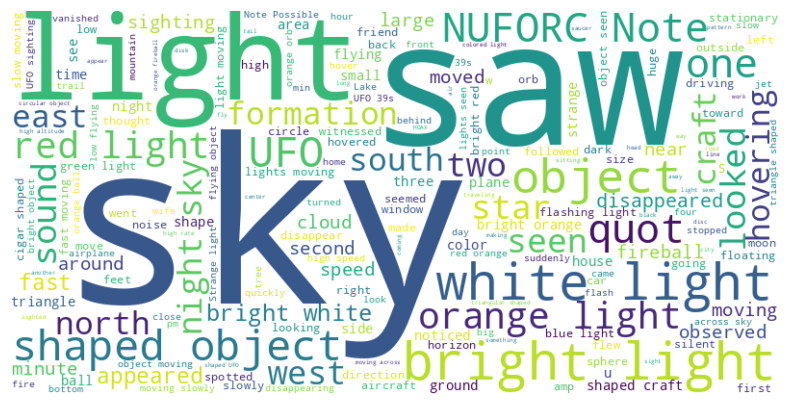

In [ ]:
# @title
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(UFO_dataset['comments'].to_numpy()))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#####***Key findings:-***  
* Most UFO-sightings cases in the usa approx. 93% of overall sightings cases from .1950 - 2014.
* in the peroid of evening(37.6%), night(42.7%) total 80% sightings incidents between these time peroids.

* in most cases UFO-shape was found **light**(in 17k cases), **fireball**(5k),**disk**,**triangle**,**circle** etc.

* after the year 1995 **UFO** cases are increased by 3x.and in the recent three years (2011,2012,2013) **UFO** cases increased.

* the durations of a UFO on the sky is average 4 minutes.

* in the **california** states of usa more than 12k cases was registered.this is the average 17% of the total cases in the USA country.

* after visualiing the comments dataset there are most keywords are like white light,bright light,red light,bright white,flashing light,lights moving,light,orange light indications of a light shape object.



**Thankyou!**